# Curvefit

We can eaily fit noisy data with `CurveFit` and investigate the results.

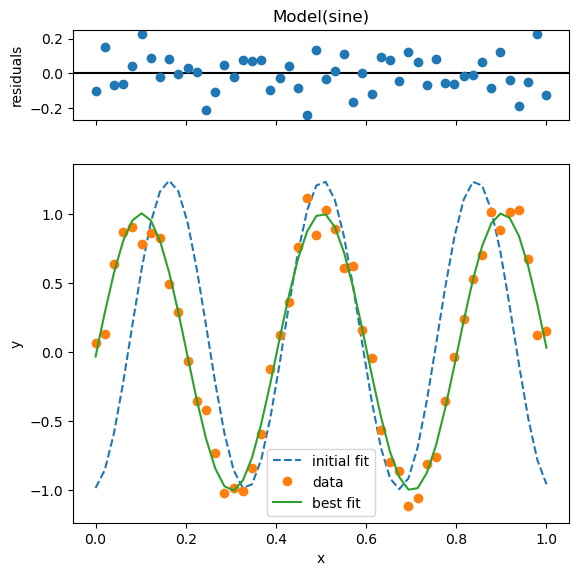

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from labcodes import fitter, models

xdata = np.linspace(0, 1)
ydata = np.sin(2*np.pi*2.5*xdata) + np.random.normal(size=len(xdata), scale=0.1)

cfit = fitter.CurveFit(xdata, ydata, models.SineModel())
cfit.plot(show_init=True)
cfit.result  # Rich output!

The fit is finshed with guessed parameters. 
Of course you can manually provide the initial value for parameters with

In [2]:
cfit = fitter.CurveFit(xdata, ydata, models.SineModel(), fit_kws=dict(freq=2.5))
cfit.result.params

name,value,standard error,relative error,initial value,min,max,vary,expression
amp,1.00530670,0.02190101,(2.18%),1.1178488567976939,-inf,inf,True,
freq,2.50037233,0.01106857,(0.44%),2.5,-inf,inf,True,
phase,-0.03293318,0.04048386,(122.93%),-1.4451326206513047,-inf,inf,True,
offset,0.00279951,0.01530803,(546.81%),0.12705790530345928,-inf,inf,True,
period,0.39994044,0.00177044,(0.44%),0.4,-inf,inf,False,1/freq


or just redo it like

In [3]:
cfit.fit(freq=2.5)
cfit.result.params

name,value,standard error,relative error,initial value,min,max,vary,expression
amp,1.00530670,0.02190101,(2.18%),1.1178488567976939,-inf,inf,True,
freq,2.50037233,0.01106857,(0.44%),2.5,-inf,inf,True,
phase,-0.03293318,0.04048386,(122.93%),-1.4451326206513047,-inf,inf,True,
offset,0.00279951,0.01530803,(546.81%),0.12705790530345928,-inf,inf,True,
period,0.39994044,0.00177044,(0.44%),0.4,-inf,inf,False,1/freq


Also you can set constraints for parameters. 

name,value,standard error,relative error,initial value,min,max,vary,expression
amp,1.00524311,0.02158532,(2.15%),1.1178488567976939,0.00000000,inf,True,
freq,2.50000000,0.00000000,(0.00%),2.5,-inf,inf,False,
phase,-0.03174777,0.02071782,(65.26%),-0.06283185307179551,-inf,inf,True,
offset,0.00276489,0.01511026,(546.51%),0.12705790530345928,-inf,inf,True,
period,0.40000000,0.00000000,(0.00%),0.4,-inf,inf,False,1/freq


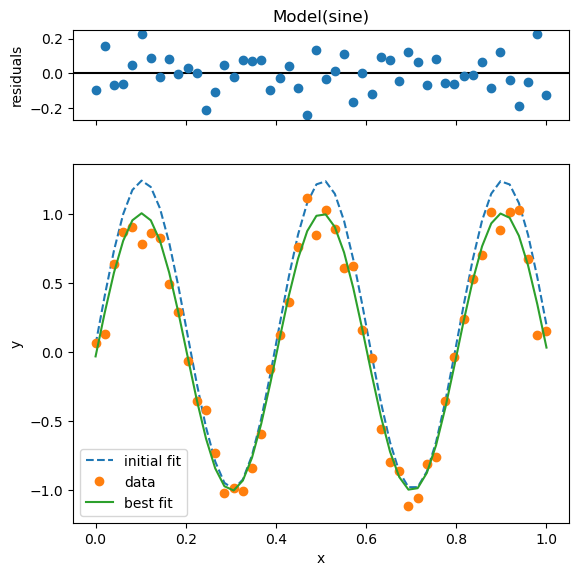

In [4]:
cfit = fitter.CurveFit(xdata, ydata, models.SineModel(), hold=True)
cfit.model.set_param_hint('amp', min=0)
cfit.model.set_param_hint('freq', value=2.5, vary=False)
cfit.fit()
cfit.plot(show_init=True)
cfit.result.params

To summarize, you can set parameters via two interface:
1. kwargs passed to `fit` function, e.g.
   - `cfit.fit(amp=1)`
   - `cfit = CurveFit(xdata, ydata, model, dict(amp=1))`
2. set_param_hints before fit, e.g.
   - `cfit.model.set_param_hints('amp', value=1, min=0)`

Note that `param_hints` must set before fit. It may also be used when guessing parameters.
Like in above example, the guessed `phase` benefits from the accurate value of `freq` in `param_hints`.

# BatchFit

Often we want to fit a two-dimensional data, like below.

<Axes: xlabel='bias', ylabel='time'>

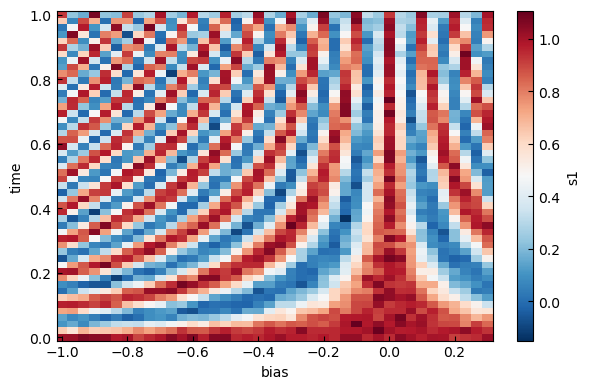

In [5]:
t = np.linspace(0, 1, 50)
bias = np.linspace(-1, 0.3, 40)
t_grid, z_grid = np.meshgrid(t, bias)
df = pd.DataFrame({'time': t_grid.ravel(), 'bias': z_grid.ravel()})
df['s1'] = np.cos(2*np.pi * 10 * df['bias'] * df['time']) / 2 + 0.5 + 0.05 * np.random.randn(len(df))

from labcodes import plotter
plotter.plot2d_collection(df, 'bias', 'time', 's1')

It is easy to fit the freq at each bias, with `BatchFit`.